In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
image = cv2.imread('rgb.jpg', 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height = image.shape[0] 
width = image.shape[1] 
color = image.shape[2]

In [8]:
print(height)
print(width)
print(color)

246
246
3


In [9]:
print("complexity =" , height*width*color)

complexity = 181548


In [10]:
for i in range(height):
    for j in range(width):
        for k in range(color):
            image[i][j][k]

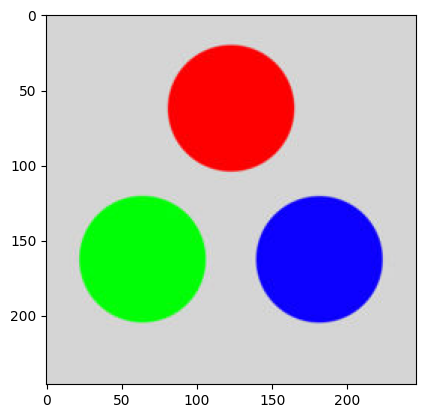

In [11]:
plt.imshow(image)

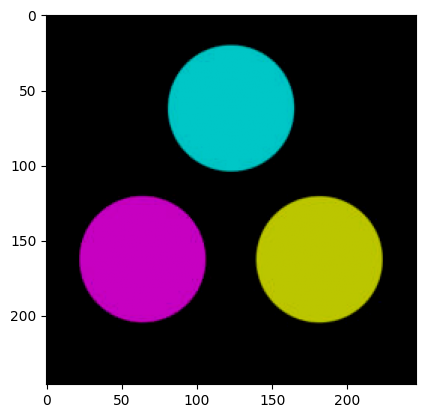

In [12]:
#Linear (Negative and Identity Transformation)
mn=10000000000000000000
for i in range(height):
    for j in range(width):
        for k in range(color):
            mn=min(mn,image[i][j][k])



newimg=np.empty(shape=(height,width,color))

#s=l-1-r
#l range[0-255]

L=int(input("Enter the l value = "))


for i in range(height):
    for j in range(width):
        for k in range(color):
            newimg[i][j][k]=L-1-image[i][j][k]
            newimg[i][j][k]=max(0,newimg[i][j][k])
            newimg[i][j][k]=min(255,newimg[i][j][k])
            newimg[i][j][k]/=255
            
plt.imshow(newimg)




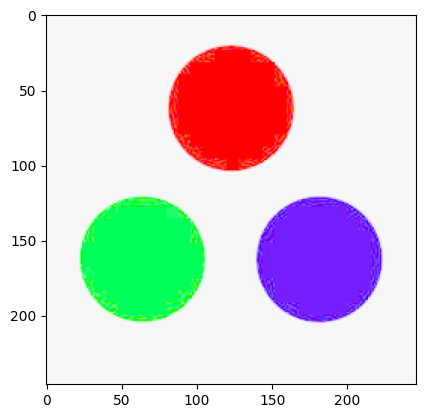

In [13]:
#logarithmic transformation
mx=-1
for i in range(height):
    for j in range(width):
        for k in range(color):
            mx=max(mx,image[i][j][k])



newimg=np.empty(shape=(height,width,color))
#s=c*log(1+r)
#c=255/log(1+maxpixel)

c=255/np.log(1+mx)
for i in range(height):
    for j in range(width):
        for k in range(color):
            newimg[i][j][k]=c*np.log(1+image[i][j][k])
            newimg[i][j][k]=max(0,newimg[i][j][k])
            newimg[i][j][k]=min(255,newimg[i][j][k])
            newimg[i][j][k]/=255
            
plt.imshow(newimg)

#Power Law or Gamma Correction transformatiom

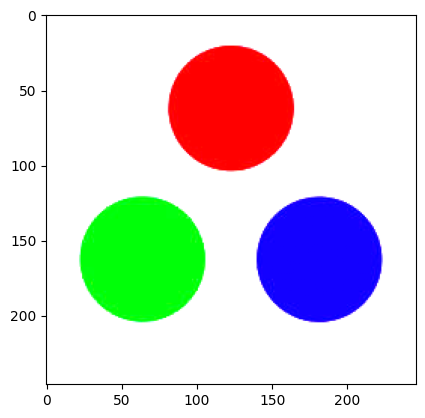

In [14]:



# use gamma value [.5 to 1.5 to get btter performace] 
# to dark 0.8 
# to bright the image 1.2


gamma=np.float32(input("Enter gamma value = "))

neg=0
if(gamma<0):
    neg=1
    gamma=np.abs(gamma)

newimg=np.empty(shape=(height,width,color))
for i in range(height):
    for j in range(width):
        for k in range(color):
            newimg[i][j][k]=np.power(image[i][j][k],gamma)
            

            if(neg==1):
                newimg[i][j][k]=1/newimg[i][j][k]
            
           
            newimg[i][j][k]=max(0,newimg[i][j][k])
            newimg[i][j][k]=min(255,newimg[i][j][k])
            newimg[i][j][k]/=255
        


plt.imshow(newimg)

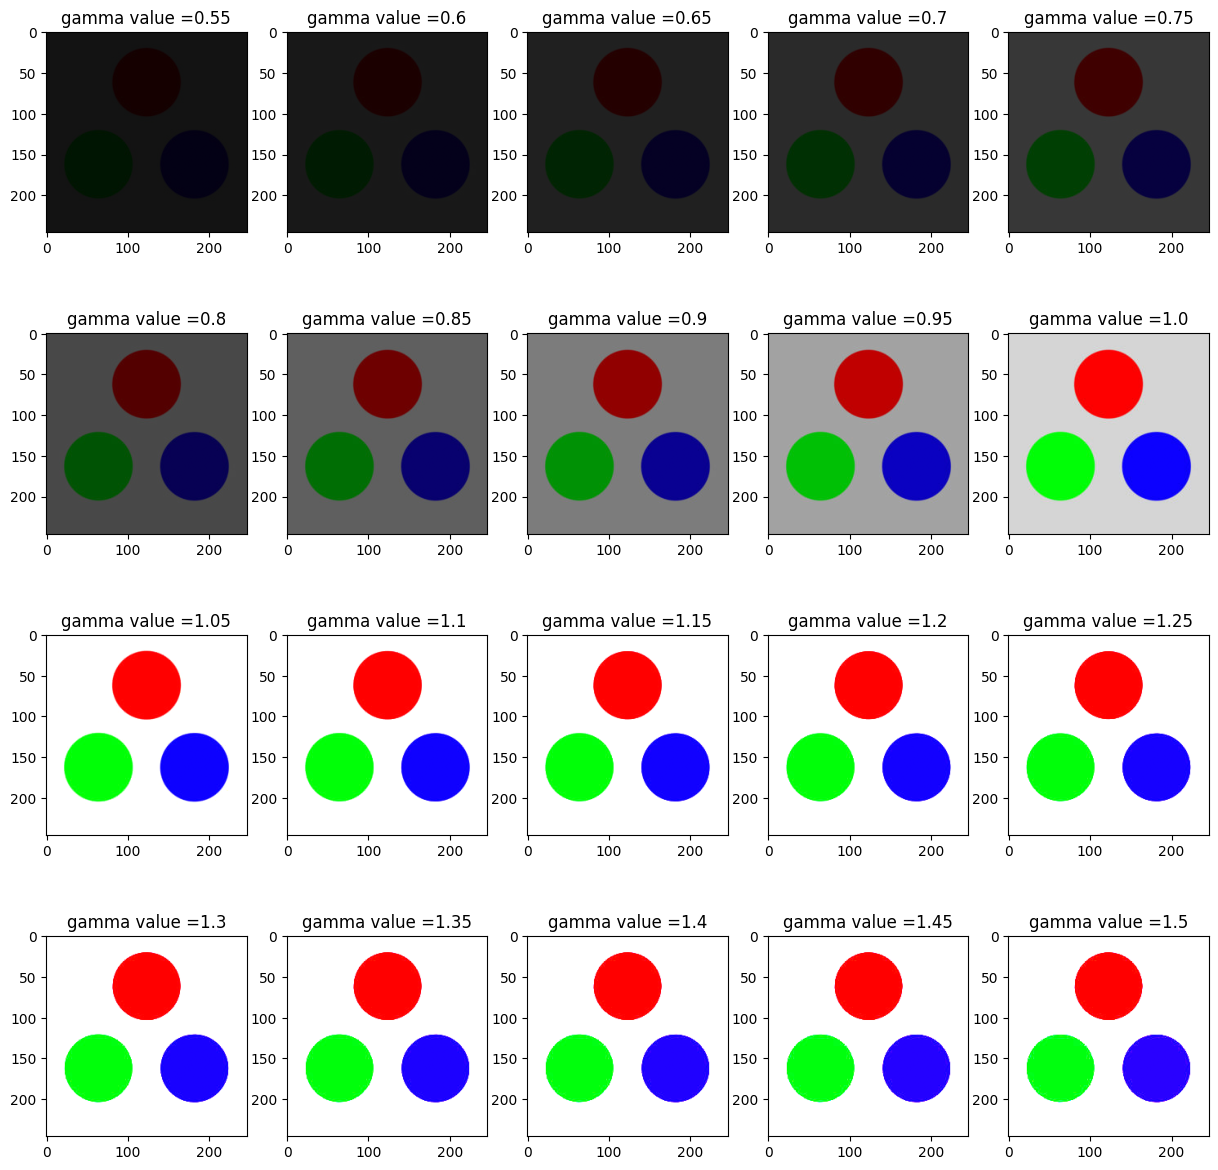

In [15]:

samples=int(20)

fig, axs = plt.subplots(int(samples/5), 5, figsize=(15, 15))
#fig, axs = plt.subplots()

gamma=.5
newimg=np.empty(shape=(height,width,color))
for z in range(samples):
    gamma+=.05
    neg=0
    if(gamma<0):
        neg=1
        gamma=np.abs(gamma)

    
    for i in range(height):
        for j in range(width):
            for k in range(color):
                newimg[i][j][k]=np.power(image[i][j][k],gamma)
                

                if(neg==1):
                    newimg[i][j][k]=1/newimg[i][j][k]
                
            
                newimg[i][j][k]=max(0,newimg[i][j][k])
                newimg[i][j][k]=min(255,newimg[i][j][k])
                newimg[i][j][k]/=255


    axs[int(z/5)][z%5].imshow(newimg)
    string="gamma value ="+str(round(gamma,2))
    axs[int(z/5)][z%5].set_title(string)  
    



#constrast strecting (thershold)

Text(0.5, 1.0, 'threshold')

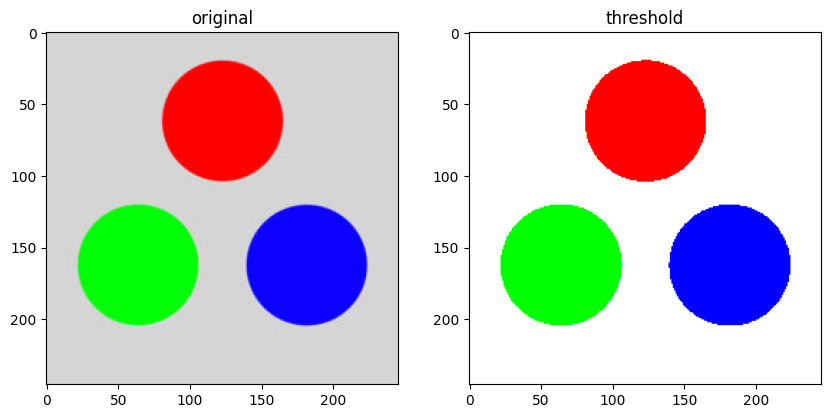

In [16]:


th=int(input("input threashold value ="))


newimg=np.empty(shape=(height,width,color))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title("original") 


for i in range(height):
        for j in range(width):
            for k in range(color):
              if(image[i][j][k]>=th):
                newimg[i][j][k]=255
              else:
                newimg[i][j][k]=0
              newimg[i][j][k]/=255


axs[1].imshow(newimg)
axs[1].set_title("threshold") 
                


#constrast strecting (Max-min)

Text(0.5, 1.0, 'max-min')

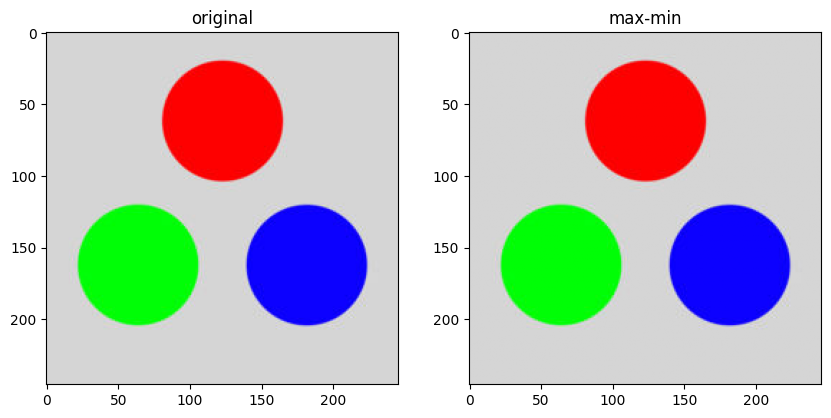

In [17]:

newimg=np.empty(shape=(height,width,color))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title("original")   
for k in range(color):
  mx=-1
  mn=1000000000000
  for i in range(height):
      for j in range(width):
          for z in range(color):
              mx=max(mx,image[i][j][z])
              mn=min(mn,image[i][j][z])
  for i in range(height):
          for j in range(width):
              newimg[i][j][k]=(255*(image[i][j][k]-mn))/(mx-mn)
              newimg[i][j][k]/=255

axs[1].imshow(newimg)
axs[1].set_title("max-min")  



#constrast strecting (Percentile)

Text(0.5, 1.0, 'Percetile')

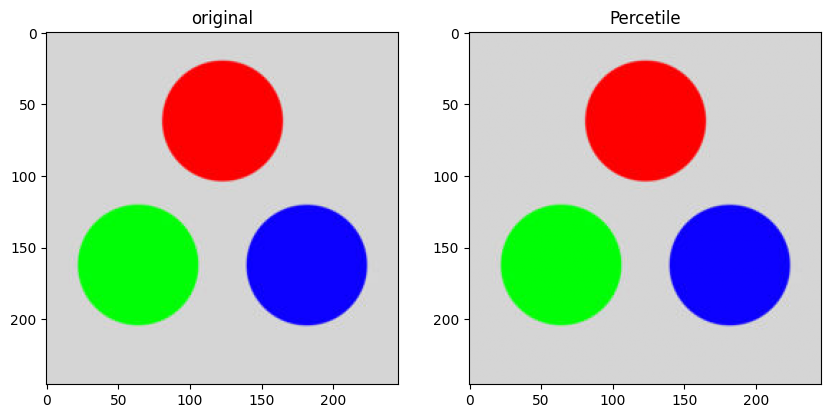

In [18]:
newimg=np.empty(shape=(height,width,color))

C=int(input("Enter C value ="))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title("original")   
for k in range(color):
  mx=-1
  mn=1000000000000
  mx-=C
  mn+=C
  for i in range(height):
      for j in range(width):
          for z in range(color):
              mx=max(mx,image[i][j][z])
              mn=min(mn,image[i][j][z])
  for i in range(height):
          for j in range(width):
              newimg[i][j][k]=(255*(image[i][j][k]-mn))/(mx-mn)
              newimg[i][j][k]/=255

axs[1].imshow(newimg)
axs[1].set_title("Percetile")  

#intensity level slicing 

Text(0.5, 1.0, 'threshold')

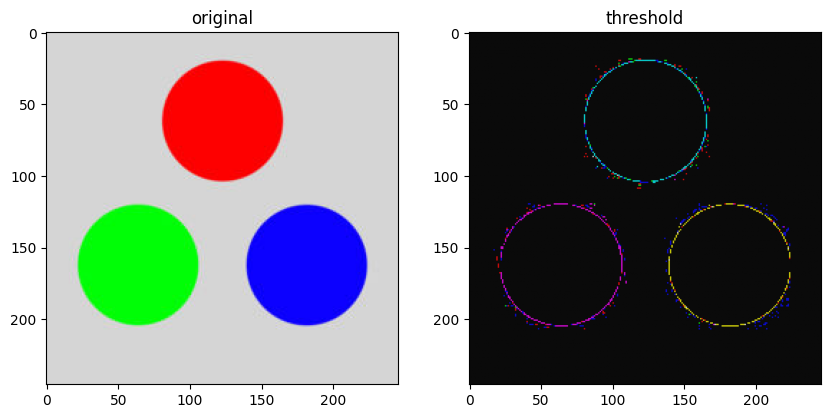

In [19]:

lw,hi=input("Enter two values:[low and high] ").split()

lw=int(lw)
hi=int(hi)

newimg=np.empty(shape=(height,width,color))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title("original") 


for i in range(height):
        for j in range(width):
            for k in range(color):
              if(image[i][j][k]>=lw and image[i][j][k]<=hi ):
                newimg[i][j][k]=200
              else:
                newimg[i][j][k]=10
              newimg[i][j][k]/=255


axs[1].imshow(newimg)
axs[1].set_title("threshold") 